In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv("../data/BTC-USD_features.csv", parse_dates=["Date"])
model = joblib.load("../models/LinearRegression()_model.pkl")
df.head()

,Date,Close,High,Low,Open,Volume,Daily_Return,Volatility,MA7,MA21,RSI,Middle,Upper,Lower,Lag1,Lag2,Lag3,volatility_21
0,2020-02-10,9856.611328,10165.765625,9784.563477,10115.559570,3.938655e+10,-0.025706,0.023776,9736.933733,9232.250372,70.657981,9256.568164,10311.839014,8201.297314,10116.673828,9865.119141,9795.943359,0.022055
1,2020-02-11,10208.236328,10210.052734,9729.334961,9855.891602,3.764806e+10,0.035674,0.023672,9883.687081,9301.885696,69.359043,9332.936182,10432.906804,8232.965559,9856.611328,10116.673828,9865.119141,0.022955
2,2020-02-12,10326.054688,10393.611328,10202.387695,10202.387695,4.344430e+10,0.011541,0.019143,9985.491490,9380.227539,72.231071,9428.913135,10523.492200,8334.334070,10208.236328,9856.611328,10116.673828,0.022704
3,2020-02-13,10214.379883,10457.626953,10116.161133,10323.960938,4.935607e+10,-0.010815,0.020704,10054.716936,9466.316313,66.107564,9517.360400,10562.072435,8472.648366,10326.054688,10208.236328,9856.611328,0.021275
4,2020-02-14,10312.116211,10321.996094,10125.534180,10211.550781,4.333826e+10,0.009569,0.020723,10128.455915,9555.205915,72.584277,9614.573828,10566.636255,8662.511402,10214.379883,10326.054688,10208.236328,0.021245


In [19]:
features = ['Close', 'Daily_Return', "Volatility", "MA7", 
            'MA21', 'Upper', 'Lower', "Lag1", "Lag2", 
            "Lag3", "volatility_21"]

y = df['Close']
X = df[features]

In [23]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

results = pd.DataFrame({'Date': df['Date'],
                        'Actual': y,
                        'Predicted': y_pred})
results.head()

Mean Squared Error: 34139.20739973715
R^2 Score: 0.9999625587051914


,Date,Actual,Predicted
0,2020-02-10,9856.611328,9945.385055
1,2020-02-11,10208.236328,10312.534495
2,2020-02-12,10326.054688,10434.491739
3,2020-02-13,10214.379883,10302.132195
4,2020-02-14,10312.116211,10404.512996


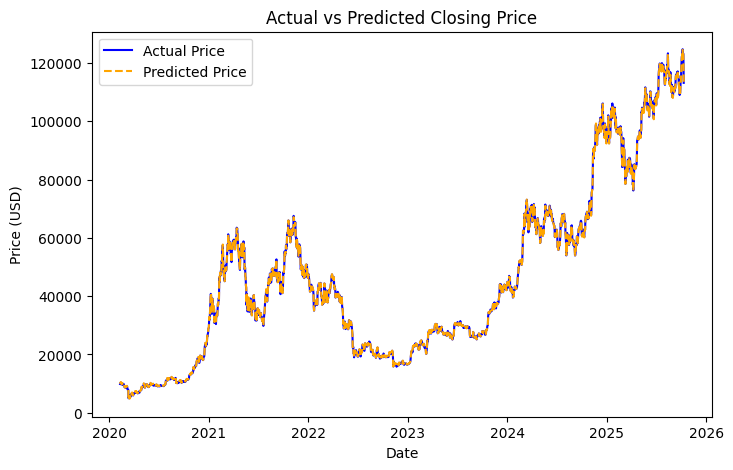

In [25]:
plt.figure(figsize=(8,5))
plt.plot(results['Date'], results['Actual'], label='Actual Price', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted Price', color='orange', linestyle='--')
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [27]:
results["difference_perct"] = (results["Actual"] - results["Predicted"] )/ results["Actual"] * 100
results["difference_perct"] = results["difference_perct"].round(2)
results.head(7)

,Date,Actual,Predicted,difference_perct
0,2020-02-10,9856.611328,9945.385055,-0.90
1,2020-02-11,10208.236328,10312.534495,-1.02
2,2020-02-12,10326.054688,10434.491739,-1.05
3,2020-02-13,10214.379883,10302.132195,-0.86
4,2020-02-14,10312.116211,10404.512996,-0.90
5,2020-02-15,9889.424805,9944.684899,-0.56
6,2020-02-16,9934.433594,9999.968168,-0.66


In [29]:
mean_diff = results["difference_perct"].mean()
max_diff = results["difference_perct"].max()
min_diff = results["difference_perct"].min()
print(f"Mean Percentage Difference: {mean_diff.round(2)}%")
print(f"Max Percentage Difference: {max_diff}%")
print(f"Min Percentage Difference: {min_diff}%")

Mean Percentage Difference: -0.14%
Max Percentage Difference: 6.56%
Min Percentage Difference: -3.92%


The Linear Regression model performs better than Random forest Regressor . 
Linear Regression - MSE: 2135.1744763879447, R2: 0.9863098904516744
Random Forest Regressor - MSE: 31858.88344657085, R2: -2.047904021276742

The average percentage deviation between the actual and predicted closing price is around -0.14%.